In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from matplotlib.pyplot import figure

## Universe Class

Below I have coded a universe class that is instantiated with a list parameter, where the elements of the list are scaled radiation density, scaled matter density, spacial curvature density, and vacuum density in that order. Alternatively, you can simply input the parameters big_omega and small_omega to create a simplified equation for time that only depends on the radiation and matter density. For both the simple an the complex model, the information given by the unvierse class's functions can be used to calculate the scale factor of the given universe.

In [2]:
class universe:
    def __init__(self, params = None, big_omega = None, small_omega = None):
        self.dark = False
        if (small_omega == None or big_omega == None) and params == None:
            raise ValueError("Must provide big_omega or params")
        elif (big_omega != None or small_omega != None) and params != None:
            raise ValueError("Provide only big_omega or params, not both")
        elif params != None:
            self.dark = True
        
        self.w = small_omega
        self.O = big_omega
        self.params = params
        self.a = Symbol('a', positive = True)
        self.H0 = Symbol('H0')
    
    def time(self):
        #returns an expression for t*H0 in terms of the scale factor
        a = self.a
        if not self.dark:
            O = float(self.O)
            w = float(self.w)
            p = float(3*(1+w))
            V = float((1-O))
            return integrate( ( O/(a**(p - 2) ) + (V)/(a**(2-2)) )**(-1/2) , a)
        else:
            p = self.params
            if self.params == [0, 0, 0, 0]:
                return 0
            else:
                return integrate( (p[0]*a**(-2) + p[1]*a**(-1) + p[2] + p[3]*a**(2))**(-1/2), a )
            
    def time_str(self):
        time_rounded = self.time()
        for a in preorder_traversal(time_rounded):
            if isinstance(a, Float):
                time_rounded = time_rounded.subs(a, round(a, 2))
        return time_rounded/self.H0
            
    def age(self):
        # return age of universe in terms of Hubble time, using the fact a(t0) = 1
        return self.time().subs(a, 1)
    
    def age_str(self):
        return self.age()/self.H0

### Here are some examples of the simple model of the Universe being used

In [3]:
a = Symbol('a', positive = True)
ua = universe(big_omega = 1, small_omega = 0)
display(Markdown("#### Equation for time in flat, matter-dominated universe:"))
display(ua.time_str())
display(Markdown("#### Equation for time in flat, radiation-dominated universe:"))
ua = universe(big_omega = 1, small_omega = 1/3)
display(ua.time_str())
display(Markdown("#### Current age of radiation-dominated universe:"))
display(ua.age_str())

#### Equation for time in flat, matter-dominated universe:

0.67*a**1.5/H0

#### Equation for time in flat, radiation-dominated universe:

0.5*a**2.0/H0

#### Current age of radiation-dominated universe:

0.5/H0

#### Now, let's graph how the scale factor changes with changes to small_omega, the equation of state parameter for a flat universe

#### Equations for t:

0.67*a**1.5/H0

0.52*a**1.93/H0

0.42*a**2.36/H0

0.36*a**2.79/H0

0.31*a**3.21/H0

0.27*a**3.64/H0

0.25*a**4.07/H0

0.22*a**4.5/H0

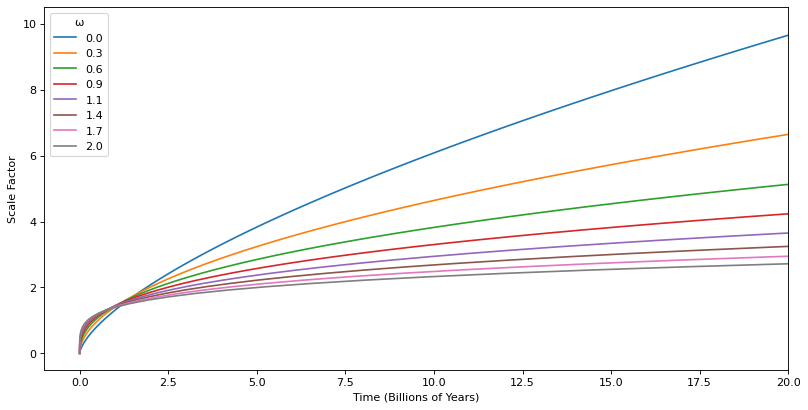

In [4]:
oms = np.linspace(0, 2, 8)

figure(figsize=(12, 6), dpi=80)
plt.xlim(-1, 20)

eqs = []

for om in oms:
    times = []
    un = universe(big_omega = 1, small_omega = om)
    eq = un.time()
    sfs = np.linspace(0, 10, 100)
    for sf in sfs:
        times.append(eq.subs(a, sf))
    
    plt.plot(times, sfs, label = (round(om, 1)))
    eqs.append(un.time_str())

plt.legend(title = "ω")
plt.xlabel("Time (Billions of Years)")
plt.ylabel("Scale Factor")

display(Markdown("#### Equations for t:"))
for eq in eqs:
    display(eq)




Now we will create insntances of the universe class using the full set of density parameters. This will allow us to see how the time progression fo the scale factor compares between different universes dominated by different terms of the Friedmann equation.

In [5]:
u0 = universe(params = [1, 0, 0, 0])
sf0 = u0.time()

u1 = universe(params = [0, 1, 0, 0])
sf1 = u1.time()

u2 = universe(params = [0, 0, 1, 0])
sf2 = u2.time()

u3 = universe(params = [0, 0, 0, 1])
sf3 = u3.time()


In [6]:
display(Markdown("#### Time equation from domminant radiation term"))
display(u0.time_str())

display(Markdown("#### Time equation from dominant matter term"))
display(u1.time_str())

display(Markdown("#### Time equation from dominant spectral cuvature term"))
display(u2.time_str())

display(Markdown("#### Time equation from dominant cosmological constant term"))
display(u3.time_str())

#### Time equation from domminant radiation term

0.5*a**2.0/H0

#### Time equation from dominant matter term

0.67*a**1.5/H0

#### Time equation from dominant spectral cuvature term

a/H0

#### Time equation from dominant cosmological constant term

log(a)/H0

We will now graph these equations and see how changing scale factor over time compares between them

In [7]:
facts = np.linspace(0, 6, 100)
t0 = []
t1 = []
t2 = []
t3 = []
for s_fact in facts:
    t0.append((sf0.subs(a, s_fact) - u0.age())*14)
    t1.append((sf1.subs(a, s_fact) - u1.age())*14)
    t2.append((sf2.subs(a, s_fact) - u2.age())*14)
    t3.append((sf3.subs(a, s_fact) - u3.age())*14)



Text(0, 0.5, 'Scale Factor')

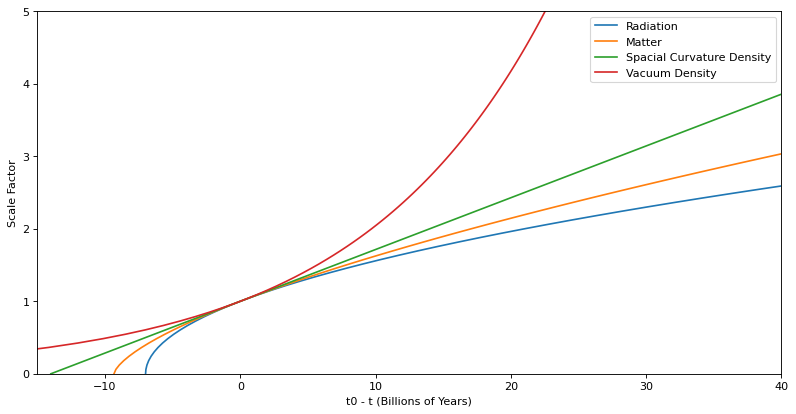

In [8]:
figure(figsize=(12, 6), dpi=80)

plt.plot(t0, facts, label = "Radiation")
plt.plot(t1, facts, label = "Matter")
plt.plot(t2, facts, label = "Spacial Curvature Density")
plt.plot(t3[1:], facts[1:], label = "Vacuum Density")
plt.xlim(-15, 40)
plt.ylim(0, 5)
plt.legend()
plt.xlabel("t0 - t (Billions of Years)")
plt.ylabel("Scale Factor")

From this graph, we see that in a radiation and matter dominated universes, the scale factor does increase with time, but at a descelerating rate. The equation with just the spacial curvature density has scale factor increase at a constant liner rate, and the universe dominated by the vacuum density constant has an increasing scale factor that speeds up its rate of increase over time.